<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%ED%88%AC%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data=pd.read_csv('./train.csv')
data=data.drop(['index'],axis=1)
data
#데이터 불러오기

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [3]:
data.isnull().sum().sum()
#결측값 개수 확인, 없었다.

0

In [4]:
Y=data['voted']
data=data.drop(['voted'],axis=1)
#타겟 변수 따로 빼주기

In [5]:
cate=data[['age_group','gender','race','religion']]
cate
#범주형 자료만 따로 빼주기

,age_group,gender,race,religion
0,30s,Female,White,Other
1,20s,Female,Asian,Hindu
2,30s,Male,White,Other
3,20s,Female,Asian,Hindu
4,20s,Male,White,Agnostic
...,...,...,...,...
45527,10s,Female,White,Jewish
45528,30s,Male,White,Atheist
45529,10s,Female,White,Christian_Other
45530,40s,Male,White,Atheist


In [6]:
from sklearn.preprocessing import OrdinalEncoder
encoding=OrdinalEncoder()
encoding_result=encoding.fit_transform(cate)
#범주형 변수를 숫자로 바꾸어 준다.

In [7]:
encoding.categories_
#범주 확인

[array(['+70s', '10s', '20s', '30s', '40s', '50s', '60s'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Arab', 'Asian', 'Black', 'Indigenous Australian',
        'Native American', 'Other', 'White'], dtype=object),
 array(['Agnostic', 'Atheist', 'Buddhist', 'Christian_Catholic',
        'Christian_Mormon', 'Christian_Other', 'Christian_Protestant',
        'Hindu', 'Jewish', 'Muslim', 'Other', 'Sikh'], dtype=object)]

In [8]:
encoding_result
#array 형태로 되어있음을 확인!

array([[ 3.,  0.,  6., 10.],
       [ 2.,  0.,  1.,  7.],
       [ 3.,  1.,  6., 10.],
       ...,
       [ 1.,  0.,  6.,  5.],
       [ 4.,  1.,  6.,  1.],
       [ 2.,  1.,  6.,  0.]])

In [9]:
encoding_result=pd.DataFrame(encoding_result)
encoding_result
#데이터 프레임 형식으로 바꾸어 준다.

,0,1,2,3
0,3.0,0.0,6.0,10.0
1,2.0,0.0,1.0,7.0
2,3.0,1.0,6.0,10.0
3,2.0,0.0,1.0,7.0
4,2.0,1.0,6.0,0.0
...,...,...,...,...
45527,1.0,0.0,6.0,8.0
45528,3.0,1.0,6.0,1.0
45529,1.0,0.0,6.0,5.0
45530,4.0,1.0,6.0,1.0


In [10]:
encoding_result=encoding_result.astype(float)
encoding_result.columns=['age_group','gender','race','religion']
encoding_result
#데이터 프레임 정제작업

,age_group,gender,race,religion
0,3.0,0.0,6.0,10.0
1,2.0,0.0,1.0,7.0
2,3.0,1.0,6.0,10.0
3,2.0,0.0,1.0,7.0
4,2.0,1.0,6.0,0.0
...,...,...,...,...
45527,1.0,0.0,6.0,8.0
45528,3.0,1.0,6.0,1.0
45529,1.0,0.0,6.0,5.0
45530,4.0,1.0,6.0,1.0


In [11]:
data[['age_group','gender','race','religion']] = encoding_result
#정제해준 데이터셋을 다시 원래 데이터셋에 적용시킨다.

In [12]:
data #적용된 결과 확인

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,3.0,2,1,4,0.0,1,3,6.0,10.0,2,2,2,1,2,1,7,4,4,3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,2.0,4,2,3,0.0,1,1,1.0,7.0,1,1,0,0,1,2,3,4,0,4,3,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,3.0,3,1,3,1.0,1,2,6.0,10.0,2,3,1,5,3,4,2,6,1,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,2.0,4,2,0,0.0,1,1,1.0,7.0,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,2.0,3,1,2,1.0,1,2,6.0,0.0,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,1.0,2,1,1,0.0,3,1,6.0,8.0,1,2,6,1,2,6,3,0,6,4,3,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,3.0,2,1,2,1.0,1,1,6.0,1.0,2,2,2,3,1,3,3,4,1,5,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,1.0,2,1,1,0.0,1,1,6.0,5.0,4,4,2,4,0,1,0,2,1,6,2,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,4.0,4,1,2,1.0,3,1,6.0,1.0,1,2,0,4,0,1,3,2,2,4,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [13]:
#타겟(투표)와 칼럼별 상관관계 알아보기

for var in data:
  print(var,'와(과) 투표간 상관관계 :')
  print(data[var].corr(Y))
  print()

QaA 와(과) 투표간 상관관계 :
-0.0388197038981766

QaE 와(과) 투표간 상관관계 :
0.0006358439684667267

QbA 와(과) 투표간 상관관계 :
0.09920883482142222

QbE 와(과) 투표간 상관관계 :
-0.001804603715868469

QcA 와(과) 투표간 상관관계 :
0.04514837576689324

QcE 와(과) 투표간 상관관계 :
-0.012660604452945796

QdA 와(과) 투표간 상관관계 :
0.0004424791057151536

QdE 와(과) 투표간 상관관계 :
0.004188372729023787

QeA 와(과) 투표간 상관관계 :
0.009300313179077386

QeE 와(과) 투표간 상관관계 :
0.006181405552191428

QfA 와(과) 투표간 상관관계 :
-0.030308866701178466

QfE 와(과) 투표간 상관관계 :
0.007940444914254873

QgA 와(과) 투표간 상관관계 :
-0.023765070910862773

QgE 와(과) 투표간 상관관계 :
0.0027592377823574634

QhA 와(과) 투표간 상관관계 :
0.05160397614184543

QhE 와(과) 투표간 상관관계 :
-0.005180512013643595

QiA 와(과) 투표간 상관관계 :
-0.05705570726829824

QiE 와(과) 투표간 상관관계 :
0.002744575757638606

QjA 와(과) 투표간 상관관계 :
0.08321627003240625

QjE 와(과) 투표간 상관관계 :
-0.0018210605544784948

QkA 와(과) 투표간 상관관계 :
-0.08946708281181226

QkE 와(과) 투표간 상관관계 :
0.0020136555574780035

QlA 와(과) 투표간 상관관계 :
0.02315811116290218

QlE 와(과) 투표간 상관관계 :
-0.005536

QaA 와(과) 투표간 상관관계 :


TypeError: ignored

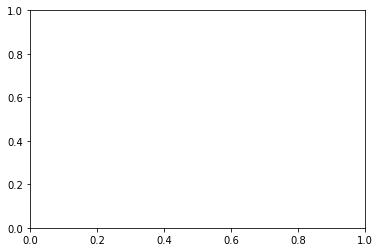

In [16]:
#속성과 타깃과의 관계를 산점도로 알아보기
import matplotlib.pyplot as plt
data_copy=data.copy()
data_copy['target']=Y
for col in data_copy:
  data_copy.plot(kind='scatter', x='col', y='target')

In [ ]:
#속성별 관계를 산점도그래프로 알아보기
import seaborn as sns


sns.pairplot(data)

In [ ]:
|